In [1]:
%matplotlib inline

In /Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [61]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

from nimare.transforms import t_to_z

import pymare

In [94]:
n_studies = 40
between_study_var = 30
true_effect = 20
sample_sizes = np.round(np.random.normal(loc=50, scale=20, size=n_studies)).astype(int)
within_study_vars = np.random.normal(loc=30, scale=20, size=n_studies)
study_means = np.random.normal(loc=true_effect, scale=between_study_var, size=n_studies)

sample_sizes[sample_sizes <= 1] = 2
within_study_vars = np.abs(within_study_vars)

In [95]:
y = study_means
X = np.ones((n_studies, 2)) * np.random.random((n_studies, 2))
v = within_study_vars
n = sample_sizes
t = y / np.sqrt(v)
z = np.array([t_to_z(t[i], sample_sizes[i] - 1) for i in range(n_studies)])
p = stats.norm.sf(abs(z)) * 2

/Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


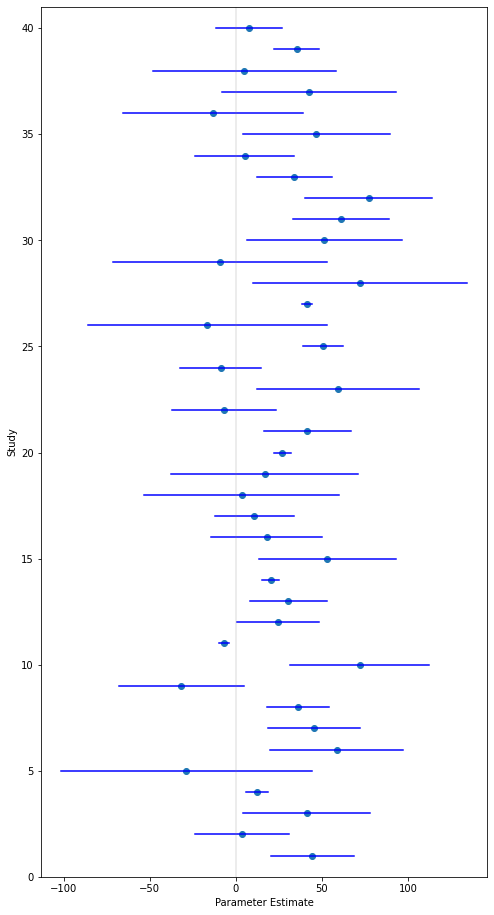

In [125]:
fig, ax = plt.subplots(figsize=(8, 16))
study_ticks = np.arange(n_studies)
ax.scatter(y, study_ticks+1)
for study in study_ticks:
    ax.plot((y[study] - v[study], y[study] + v[study]), (study+1, study+1), color='blue')
ax.axvline(0, color='gray', alpha=0.2)
ax.set_ylim((0, n_studies+1))
ax.set_xlabel('Parameter Estimate')
ax.set_ylabel('Study')
fig.show()

Let's fit a model.

In [115]:
stouff = pymare.estimators.Stouffers(input='z')
stouff.fit(y=z)
summary = stouff.summary()

In [127]:
print(summary.dataset)

None


In [126]:
print('z: {}'.format(summary.z))
print('p: {}'.format(summary.p))

z: 23.68478062610823
p: 1.0
